In [2]:
### Building a regression model to predict


# Import the dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes



In [13]:
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True)



# Transform the data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
X = X.to(device)
y = y.to(device)



In [4]:
# Check shapes and data types of the training and testing sets

print(X_train[:5])
print(y_train[:5])

print(X_test[:5])
print(y_test[:5])


tensor([[ 0.0708,  0.0507,  0.0121,  0.0563,  0.0342,  0.0494, -0.0397,  0.0343,
          0.0274, -0.0011],
        [-0.0091,  0.0507, -0.0181, -0.0332, -0.0208,  0.0122, -0.0729,  0.0712,
          0.0003,  0.0196],
        [ 0.0054, -0.0446,  0.0498,  0.0976, -0.0153, -0.0163, -0.0066, -0.0026,
          0.0170, -0.0135],
        [-0.0273, -0.0446, -0.0353, -0.0298, -0.0566, -0.0586,  0.0302, -0.0395,
         -0.0499, -0.1295],
        [-0.0237, -0.0446, -0.0655, -0.0814, -0.0387, -0.0536,  0.0597, -0.0764,
         -0.0371, -0.0425]])
tensor([144., 150., 280., 125.,  59.])
tensor([[ 0.0453, -0.0446, -0.0062, -0.0160,  0.1250,  0.1252,  0.0192,  0.0343,
          0.0324, -0.0052],
        [ 0.0926, -0.0446,  0.0369,  0.0219, -0.0250, -0.0167,  0.0008, -0.0395,
         -0.0225, -0.0218],
        [ 0.0635,  0.0507, -0.0041, -0.0126,  0.1030,  0.0488,  0.0560, -0.0026,
          0.0845, -0.0176],
        [ 0.0962, -0.0446,  0.0520,  0.0793,  0.0548,  0.0366, -0.0765,  0.1413,
       

Text(0.5, 0, 'Diabetes')

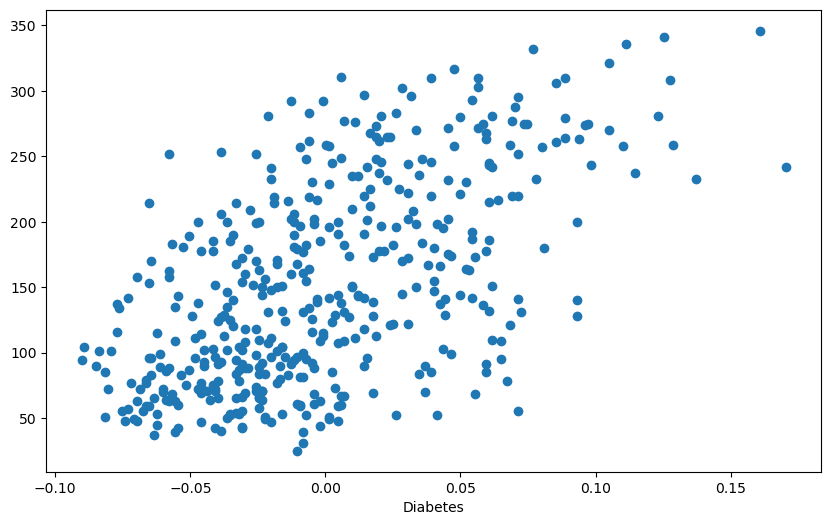

In [5]:
# Visulize the data

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 2], y)
plt.xlabel('Diabetes')


In [6]:
# Build a simple Sequential Regression Model with PyTorch

from scipy import optimize

class DiabetesModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 16)
        self.linear2 = nn.Linear(16, 64)
        self.non_linear1 = nn.ReLU()
        self.linear3 = nn.Linear(64, 64)
        self.linear4 = nn.Linear(64, 16)
        self.non_linear2 = nn.ReLU()
        self.linear5 = nn.Linear(16, 1)
        
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.non_linear1(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.non_linear2(x)
        x = self.linear5(x)
        return x

In [9]:
# Instantiate the model
DiabetesModel = DiabetesModel()

# Set a loss function and optimizer
loss_fn = F.mse_loss
optimizer = torch.optim.Adam(DiabetesModel.parameters(), lr=0.001)

# Create an accuracy function without using numpy

def accuracy(y_pred, y_actual):
    diff = torch.abs(y_pred - y_actual)
    return torch.mean(diff/y_actual)

In [14]:
# Set device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
DiabetesModel = DiabetesModel.to(device)

# Create a training loop for the model
epoch = 100

for epoch in range(epoch):
    ######## Training ##########
    DiabetesModel.train()
    
    # Forward pass
    y_logits = DiabetesModel(X_train)
    y_pred = torch.sigmoid(y_logits)
    
    # Calculate loss / accuracy
    loss = loss_fn(y_pred, y_train)
    acc = accuracy(y_pred, y_train)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    ######## Evaluation ##########
    DiabetesModel.eval()
    
    # Forward pass
    test_y_logits = DiabetesModel(X_test).squeeze()
    test_y_pred = torch.sigmoid(test_y_logits)
    
    # Calculate loss / accuracy
    test_loss = loss_fn(test_y_pred, y_test).squeeze()
    test_acc = accuracy(test_y_pred, y_test)
    
    # Print metrics
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.4f} | Acc: {acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    

C:\Users\jakev\AppData\Local\Temp\ipykernel_27272\3360546277.py:19: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(y_pred, y_train)


Epoch 1 | Loss: 29404.9551 | Acc: 0.9911 | Test Loss: 26258.1328 | Test Acc: 0.9909
Epoch 11 | Loss: 29404.9336 | Acc: 0.9911 | Test Loss: 26258.1152 | Test Acc: 0.9909
Epoch 21 | Loss: 29404.9219 | Acc: 0.9911 | Test Loss: 26258.1016 | Test Acc: 0.9909
Epoch 31 | Loss: 29404.9102 | Acc: 0.9911 | Test Loss: 26258.0938 | Test Acc: 0.9909
Epoch 41 | Loss: 29404.9004 | Acc: 0.9911 | Test Loss: 26258.0840 | Test Acc: 0.9909
Epoch 51 | Loss: 29404.8887 | Acc: 0.9911 | Test Loss: 26258.0762 | Test Acc: 0.9909
Epoch 61 | Loss: 29404.8809 | Acc: 0.9911 | Test Loss: 26258.0742 | Test Acc: 0.9909
Epoch 71 | Loss: 29404.8770 | Acc: 0.9911 | Test Loss: 26258.0645 | Test Acc: 0.9909
Epoch 81 | Loss: 29404.8691 | Acc: 0.9911 | Test Loss: 26258.0625 | Test Acc: 0.9909
Epoch 91 | Loss: 29404.8672 | Acc: 0.9911 | Test Loss: 26258.0566 | Test Acc: 0.9909


In [15]:
import requests
from pathlib import Path

# Download helper functions from PyTorch repo (if not already downloaded)
if Path('helper_functions.py').is_file() != True:
    url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'
    r = requests.get(url)
    with open('helper_functions.py', 'w') as f:
        f.write(r.text)
        
from helper_functions import plot_predictions, plot_decision_boundary

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 10x16)

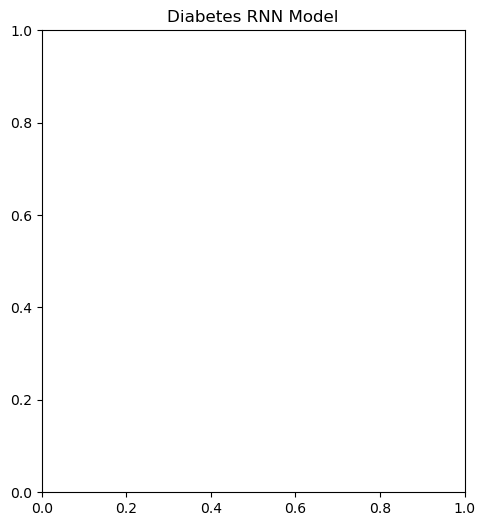

In [16]:
# Use helper function to plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Diabetes RNN Model') 
plot_decision_boundary(model=DiabetesModel,
                        X=X_test, 
                        y=y_test)